In [1]:
#1. Determine the number of subgroups from the dataset using attributes 3 to 205 i.e., exclude attributes 1, 2 and 206. Is this number same as number of classes presented by attribute 206? Explain and justify your findings.

In [2]:
import pandas as pd
data= pd.read_csv("dataset.csv")
print(data)

    Gender  Age  d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  \
0        0   18         0         0         0         0         1         0   
1        0   22         0         0         0         0         1         0   
2        0   18         0         0         0         1         0         0   
3        1   18         0         0         0         0         1         0   
4        0   19         0         0         0         0         1         0   
..     ...  ...       ...       ...       ...       ...       ...       ...   
65       1   15         0         0         1         0         0         0   
66       0    9         0         0         1         0         0         0   
67       1    8         0         0         0         1         0         0   
68       1    8         0         0         0         1         0         0   
69       1   14         0         0         0         1         0         0   

    d 5100-9  d 5101-0  ...  d 57022-8  d 57022-9  

In [3]:
from matplotlib import pyplot as plt
import numpy as np

df = data.drop(['Gender','Age','Classes'],axis=1)
print(df)

    d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  d 5100-9  \
0          0         0         0         0         1         0         0   
1          0         0         0         0         1         0         0   
2          0         0         0         1         0         0         0   
3          0         0         0         0         1         0         0   
4          0         0         0         0         1         0         0   
..       ...       ...       ...       ...       ...       ...       ...   
65         0         0         1         0         0         0         0   
66         0         0         1         0         0         0         0   
67         0         0         0         1         0         0         0   
68         0         0         0         1         0         0         0   
69         0         0         0         1         0         0         0   

    d 5101-0  d 5101-1  d 5101-2  ...  d 57022-4  d 57022-8  d 57022-9  \
0          0 

In [4]:
x = np.array(df)
print(x)
print(len(x))

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
70


C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'Number of cluster')

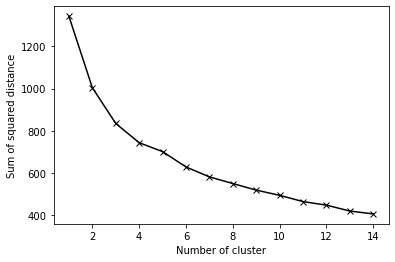

In [5]:
from sklearn.cluster import KMeans

totSqrdDist=[]
kRange=range(1,15)
for k in kRange:
    kmns = KMeans(n_clusters=k)
    kmns = kmns.fit(x)
    totSqrdDist.append(kmns.inertia_)

plt.plot(kRange,totSqrdDist,'-xk')
plt.ylabel('Sum of squared distance')
plt.xlabel('Number of cluster')

In [6]:
# 2. For the dataset, perform PCA.
#a. plot the captured variance with respect to increasing latent dimensionality. 

[18.88 32.91 42.2  47.75 52.37 56.72 60.42 63.55 66.4  69.16 71.7  73.99
 76.19 78.19 79.91 81.59 83.08 84.43 85.73 86.94 88.12 89.09 89.95 90.73
 91.49 92.2  92.86 93.47 94.06 94.58 95.08 95.55 95.99 96.4  96.76 97.11
 97.43 97.73 97.97 98.19 98.39 98.58 98.77 98.94 99.1  99.22 99.33 99.42
 99.51 99.59 99.66 99.71 99.76 99.8  99.84 99.87 99.89 99.91 99.93 99.95
 99.96 99.97 99.98 99.98 99.98 99.98 99.98 99.98 99.98 99.98]


Text(0, 0.5, 'Variance captured')

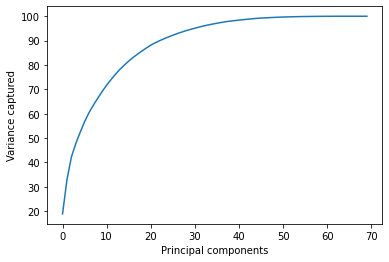

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Xnorm = scale(df)

pca = PCA(n_components=70)
pca.fit(Xnorm)

var = pca.explained_variance_ratio_

var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [8]:
#What is the minimum dimension that captures:
#i. at least 89% variance? 
#Answer:22
for i in range(len(var1)):
    if var1[i] >= 89:
        print("The minimum dimension is:",i+1)
        break

The minimum dimension is: 22


In [9]:
#ii. at least 99% variance? 
#Answer:45
for i in range(len(var1)):
    if var1[i] >= 99:
        print("The minimum dimension is:",i+1)
        break

The minimum dimension is: 45


In [10]:
#3. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. (7.5 marks)

In [11]:
data_class = data.iloc[:,-1]

data_class_array = np.array(data_class)

actual_class = []

for i in range(len(data_class_array)):
    class_num = data_class_array[i][-1]
    actual_class.append(int(class_num))

print(actual_class)
actual_class = np.array(actual_class)

[6, 6, 6, 6, 6, 2, 6, 2, 4, 7, 4, 7, 4, 7, 4, 6, 7, 6, 2, 4, 7, 7, 2, 6, 6, 6, 7, 6, 1, 6, 7, 7, 6, 6, 6, 6, 7, 4, 6, 5, 5, 2, 7, 7, 7, 4, 1, 2, 6, 7, 7, 4, 6, 6, 6, 2, 5, 6, 6, 6, 6, 4, 4, 7, 4, 4, 3, 6, 6, 6]


In [12]:
def purity_score(p_labels,a_class):
    results = {}
    for i in range(len(p_labels)):
        for j in range(len(np.unique(a_class))):
            predict = p_labels[i]
            actual = np.array(a_class)[i]
            if predict not in results:
                results[predict] = {}
            results[predict][actual] = results[predict].get(actual,0)+1              
    total_k = 0
    major_k = 0
    for each in results:
        max_k = 0
        for k in results[each]:
            total_k += results[each][k]
            if results[each][k] > max_k:
                max_k = results[each][k]
        major_k += max_k
    purity_score = round(major_k/total_k,4)*100
    return purity_score

In [13]:
#When 89% variances are captured:

pca = PCA(n_components=22)
newData = pca.fit_transform(Xnorm)
kmeans = KMeans(n_clusters=7,random_state=0).fit(newData)
Ylabels = kmeans.labels_
purity1 = round(purity_score(Ylabels,actual_class),2)
print("The purity of clusters that captured 89% variances is:",purity1)


The purity of clusters that captured 89% variances is: 84.29


In [14]:
#When 99% variances are captured:

pca = PCA(n_components=45)
newData = pca.fit_transform(Xnorm)
kmeans = KMeans(n_clusters=7,random_state=0).fit(newData)
Ylabels = kmeans.labels_
purity2 = round(purity_score(Ylabels,actual_class),2)
print("The purity of clusters that captured 99% variances is:",purity2)

The purity of clusters that captured 99% variances is: 82.86


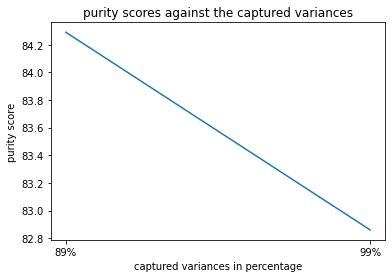

In [15]:
purity = [purity1,purity2]
captured_var = ['89%','99%']

plt.plot(captured_var,purity)
plt.xlabel('captured variances in percentage')
plt.ylabel('purity score')
plt.title('purity scores against the captured variances')
plt.show()

In [16]:
#4. Let's assume you have two datasets one is linear, and another is curved structural data.
#a. Can we apply PCA on these datasets? Justify your answer. (2.5 marks)

#Please see answers in the .pdf file.

In [17]:
#5. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. (2 marks)

In [18]:
import pandas as pd
data= pd.read_csv("heartdisease.csv")
print(data)

     Age  Sex  chest pain type  Trestbps  chol  fbs  restecg  thalach  exang  \
0     63    1                1       145   233    1        2      150      0   
1     67    1                4       160   286    0        2      108      1   
2     67    1                4       120   229    0        2      129      1   
3     37    1                3       130   250    0        0      187      0   
4     41    0                2       130   204    0        2      172      0   
..   ...  ...              ...       ...   ...  ...      ...      ...    ...   
298   45    1                1       110   264    0        0      132      0   
299   68    1                4       144   193    1        0      141      0   
300   57    1                4       130   131    0        0      115      1   
301   57    0                2       130   236    0        2      174      0   
302   38    1                3       138   175    0        0      173      0   

     oldpeak  slope ca thal  num  
0   

In [19]:
import numpy as np

for index,row in data.iterrows():
    for each in row:
        if each =="?":
            data.drop(index=[index],inplace=True)
            break
data.index = range(len(data))
print(data)

     Age  Sex  chest pain type  Trestbps  chol  fbs  restecg  thalach  exang  \
0     63    1                1       145   233    1        2      150      0   
1     67    1                4       160   286    0        2      108      1   
2     67    1                4       120   229    0        2      129      1   
3     37    1                3       130   250    0        0      187      0   
4     41    0                2       130   204    0        2      172      0   
..   ...  ...              ...       ...   ...  ...      ...      ...    ...   
292   57    0                4       140   241    0        0      123      1   
293   45    1                1       110   264    0        0      132      0   
294   68    1                4       144   193    1        0      141      0   
295   57    1                4       130   131    0        0      115      1   
296   57    0                2       130   236    0        2      174      0   

     oldpeak  slope ca thal  num  
0   

In [20]:
# Separate the class and feature matrix
att_data = data.iloc[:,:-1]
print(att_data)

class_data = data.iloc[:,-1]
print(class_data)

     Age  Sex  chest pain type  Trestbps  chol  fbs  restecg  thalach  exang  \
0     63    1                1       145   233    1        2      150      0   
1     67    1                4       160   286    0        2      108      1   
2     67    1                4       120   229    0        2      129      1   
3     37    1                3       130   250    0        0      187      0   
4     41    0                2       130   204    0        2      172      0   
..   ...  ...              ...       ...   ...  ...      ...      ...    ...   
292   57    0                4       140   241    0        0      123      1   
293   45    1                1       110   264    0        0      132      0   
294   68    1                4       144   193    1        0      141      0   
295   57    1                4       130   131    0        0      115      1   
296   57    0                2       130   236    0        2      174      0   

     oldpeak  slope ca thal  
0        

In [21]:
# Modify the num attribute, take the value 0 for no presence of CAD and bigger than 1 for the presence of CAD.

new_class_data = np.arange(len(class_data))

for index, value in class_data.iteritems():
    if value != 0:
        new_class_data[index] = 1
    else:
        new_class_data[index] = 0

print(new_class_data)

[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 1]


In [22]:
#6. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? (1 marks)

C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 0, 'Number of cluster')

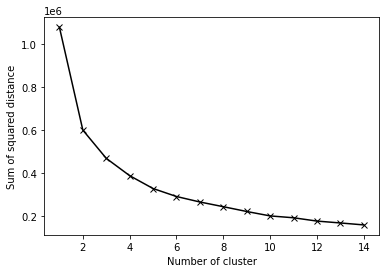

In [23]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

X = np.array(att_data)

totSqrdDist=[]
kRange=range(1,15)
for k in kRange:
    kmns = KMeans(n_clusters=k)
    kmns = kmns.fit(X)
    totSqrdDist.append(kmns.inertia_)

plt.plot(kRange,totSqrdDist,'-xk')
plt.ylabel('Sum of squared distance')
plt.xlabel('Number of cluster')

In [24]:
# According to the graph above, the number of clusters should be around 5. It is the same with the actual number of classes in the dataset.

In [25]:
# 7. Perform K-Means clustering on the complete dataset and report purity score. (2 marks)

In [26]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[ 5.14787234e+01  7.02127660e-01  3.00000000e+00  1.28500000e+02
   2.40861702e+02  1.27659574e-01  9.57446809e-01  1.64127660e+02
   2.02127660e-01  7.60638298e-01  1.51063830e+00  5.63829787e-01
   4.32978723e+00]
 [ 5.61147541e+01  5.73770492e-01  3.18032787e+00  1.35688525e+02
   3.08459016e+02  1.31147541e-01  1.08196721e+00  1.53180328e+02
   3.60655738e-01  9.93442623e-01  1.47540984e+00  7.86885246e-01
   4.60655738e+00]
 [ 5.98679245e+01  7.35849057e-01  3.35849057e+00  1.38433962e+02
   2.58396226e+02  1.69811321e-01  1.16981132e+00  1.22018868e+02
   5.47169811e-01  1.53207547e+00  1.90566038e+00  9.24528302e-01
   5.49056604e+00]
 [ 5.29880952e+01  7.26190476e-01  3.16666667e+00  1.27869048e+02
   1.91904762e+02  1.54761905e-01  8.09523810e-01  1.47785714e+02
   3.09523810e-01  1.07976190e+00  1.59523810e+00  5.35714286e-01
   4.75000000e+00]
 [ 6.26000000e+01 -1.11022302e-16  3.60000000e+00  1.35800000e+02
   4.38200000e+02  2.00000000e-01  2.00000000e+00  1.55600000e+02


In [27]:
print("The purity is:",purity_score(labels,class_data),"%")

The purity is: 53.87 %


In [28]:
# Q8. There are several distance metrics for K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski

In [29]:
# a.Your job is to compare the purity score of k-means clustering for different distance metrics

from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer as kpi
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster.kmeans import kmeans,kmeans_visualizer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

att_data.to_csv('sample.txt',sep='\t',index=False,header=False)
sample = read_sample("sample.txt")

initial_centers = kpi(sample, 2).initialize()

In [30]:
# Using different metric to calculate the distance and perform kmeans

methods = [type_metric.EUCLIDEAN,type_metric.EUCLIDEAN_SQUARE,type_metric.MANHATTAN,type_metric.CHEBYSHEV]
pre_data_set = {}

for method in methods:
    my_metric = distance_metric(method)
    kmeans_instance = kmeans(sample, initial_centers, metric=my_metric)
    kmeans_instance.process()
    clusters = kmeans_instance.get_clusters()
    final_centers = kmeans_instance.get_centers()
    pre_data = np.zeros(len(new_class_data))
    for each in clusters[0]:
        pre_data[each]=1
    pre_data_set[method] = pre_data

my_metric = distance_metric(type_metric.MINKOWSKI,degree = 4)
kmeans_instance = kmeans(sample, initial_centers, metric=my_metric)
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()
pre_data = np.zeros(len(new_class_data))
for each in clusters[0]:
    pre_data[each]=1
pre_data_set[type_metric.MINKOWSKI] = pre_data


In [31]:
# Create a function to calculate purity using different distance metrics.

def calculate_purity_kmeans_by_method(method):
    purity = purity_score(pre_data_set[method],new_class_data)
    return purity

In [32]:
purity_Euclidean = round(calculate_purity_kmeans_by_method(type_metric.EUCLIDEAN),2)
purity_Euclidean_Square = round(calculate_purity_kmeans_by_method(type_metric.EUCLIDEAN_SQUARE),2)
purity_Manhattan = round(calculate_purity_kmeans_by_method(type_metric.MANHATTAN),2)
purity_Chebyshev = round(calculate_purity_kmeans_by_method(type_metric.CHEBYSHEV),2)
purity_Minkowski = round(calculate_purity_kmeans_by_method(type_metric.MINKOWSKI),2)

In [33]:
print("The purity of Euclidean is:",purity_Euclidean,"%")
print("The purity of Euclidean Square is:",purity_Euclidean_Square,"%")
print("The purity of MANHATTAN is:",purity_Manhattan,"%")
print("The purity of CHEBYSHEV is:",purity_Chebyshev,"%")
print("The purity of MINKOWSKI is:",purity_Minkowski,"%")

The purity of Euclidean is: 57.58 %
The purity of Euclidean Square is: 57.58 %
The purity of MANHATTAN is: 59.6 %
The purity of CHEBYSHEV is: 58.92 %
The purity of MINKOWSKI is: 56.57 %


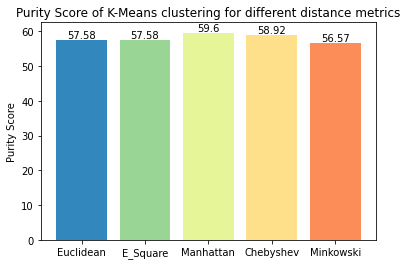

In [34]:
from bokeh.palettes import Spectral6

x_purity = ['Euclidean','E_Square','Manhattan','Chebyshev','Minkowski']
y_purity = [purity_Euclidean,purity_Euclidean_Square,purity_Manhattan,purity_Chebyshev,purity_Minkowski]

plt.bar(x_purity,y_purity,color=Spectral6)
plt.ylabel('Purity Score')
for a,b in zip(x_purity,y_purity):
    plt.text(a,b,b,ha='center',va='bottom')
plt.title('Purity Score of K-Means clustering for different distance metrics')
plt.show()

In [35]:
#Rand Index analysis
from sklearn import metrics

def calculate_rand_score_kmeans_by_method(method):
    rand_score = metrics.rand_score(pre_data_set[method],new_class_data)
    return rand_score


In [36]:
rand_score_Euclidean = round(calculate_rand_score_kmeans_by_method(type_metric.EUCLIDEAN),5)
rand_score_E_Square = round(calculate_rand_score_kmeans_by_method(type_metric.EUCLIDEAN_SQUARE),5)
rand_score_Manhattan = round(calculate_rand_score_kmeans_by_method(type_metric.MANHATTAN),5)
rand_score_Chebyshev = round(calculate_rand_score_kmeans_by_method(type_metric.CHEBYSHEV),5)
rand_score_Minkowski = round(calculate_rand_score_kmeans_by_method(type_metric.MINKOWSKI),5)

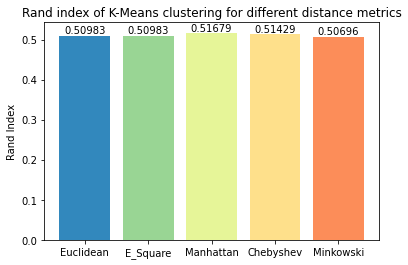

In [37]:
x_rand_index = ('Euclidean','E_Square','Manhattan','Chebyshev','Minkowski')
y_rand_index = [rand_score_Euclidean,rand_score_E_Square,rand_score_Manhattan,rand_score_Chebyshev,rand_score_Minkowski]
plt.bar(x_rand_index,y_rand_index,color=Spectral6)

for a,b in zip(x_rand_index,y_rand_index):
    plt.text(a,b,b,ha='center',va='bottom')

plt.ylabel('Rand Index')
plt.title('Rand index of K-Means clustering for different distance metrics')
plt.show()

In [38]:
#Adjusted mutual info (AMI) analysis

def calculate_AMI_score_kmeans_by_method(method):
    adjusted_mutual_info_score = metrics.adjusted_mutual_info_score(pre_data_set[method],new_class_data)
    return adjusted_mutual_info_score

In [39]:
adjusted_mutual_info_score_Euclidean = round(calculate_AMI_score_kmeans_by_method(type_metric.EUCLIDEAN),5)
adjusted_mutual_info_score_E_Square = round(calculate_AMI_score_kmeans_by_method(type_metric.EUCLIDEAN_SQUARE),5)
adjusted_mutual_info_score_Manhattan = round(calculate_AMI_score_kmeans_by_method(type_metric.MANHATTAN),5)
adjusted_mutual_info_score_Chebyshev = round(calculate_AMI_score_kmeans_by_method(type_metric.CHEBYSHEV),5)
adjusted_mutual_info_score_Minkowski = round(calculate_AMI_score_kmeans_by_method(type_metric.MINKOWSKI),5)

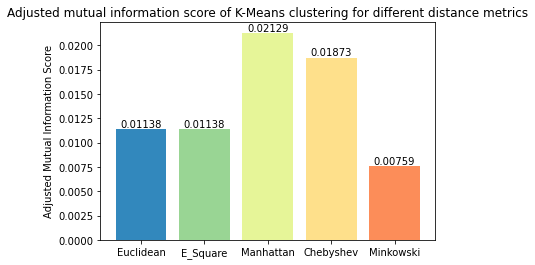

In [40]:
x_adjusted_mutual_info = ('Euclidean','E_Square','Manhattan','Chebyshev','Minkowski')
y_adjusted_mutual_info = [adjusted_mutual_info_score_Euclidean,adjusted_mutual_info_score_E_Square,adjusted_mutual_info_score_Manhattan,adjusted_mutual_info_score_Chebyshev,adjusted_mutual_info_score_Minkowski]
plt.bar(x_adjusted_mutual_info,y_adjusted_mutual_info,color=Spectral6)

for a,b in zip(x_adjusted_mutual_info,y_adjusted_mutual_info):
    plt.text(a,b,b,ha='center',va='bottom')

plt.ylabel('Adjusted Mutual Information Score')
plt.title('Adjusted mutual information score of K-Means clustering for different distance metrics')
plt.show()

In [41]:
# Homogeneity analysis

def calculate_homogeneity_score_kmeans_by_method(method):
    homogeneity_score = metrics.homogeneity_score(pre_data_set[method],new_class_data)
    return homogeneity_score

In [42]:
homogeneity_score_Euclidean = round(calculate_homogeneity_score_kmeans_by_method(type_metric.EUCLIDEAN),5)
homogeneity_score_E_Square = round(calculate_homogeneity_score_kmeans_by_method(type_metric.EUCLIDEAN_SQUARE),5)
homogeneity_score_Manhattan = round(calculate_homogeneity_score_kmeans_by_method(type_metric.MANHATTAN),5)
homogeneity_score_Chebyshev = round(calculate_homogeneity_score_kmeans_by_method(type_metric.CHEBYSHEV),5)
homogeneity_score_Minkowski = round(calculate_homogeneity_score_kmeans_by_method(type_metric.MINKOWSKI),5)

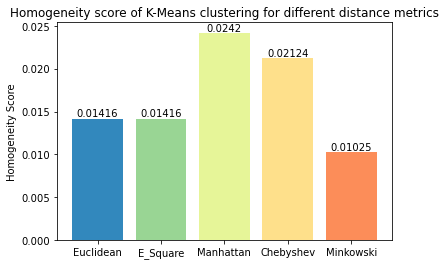

In [43]:
x_homogeneity = ('Euclidean','E_Square','Manhattan','Chebyshev','Minkowski')
y_homogeneity = [homogeneity_score_Euclidean,homogeneity_score_E_Square,homogeneity_score_Manhattan,homogeneity_score_Chebyshev,homogeneity_score_Minkowski]
plt.bar(x_homogeneity,y_homogeneity,color=Spectral6)

for a,b in zip(x_homogeneity,y_homogeneity):
    plt.text(a,b,b,ha='center',va='bottom')

plt.ylabel('Homogeneity Score')
plt.title('Homogeneity score of K-Means clustering for different distance metrics')
plt.show()

In [44]:
# Completeness analysis

def calculate_completeness_score_kmeans_by_method(method):
    completeness_score = metrics.completeness_score(pre_data_set[method],new_class_data)
    return completeness_score

In [45]:
completeness_score_Euclidean = round(calculate_completeness_score_kmeans_by_method(type_metric.EUCLIDEAN),5)
completeness_score_E_Square = round(calculate_completeness_score_kmeans_by_method(type_metric.EUCLIDEAN_SQUARE),5)
completeness_score_Manhattan = round(calculate_completeness_score_kmeans_by_method(type_metric.MANHATTAN),5)
completeness_score_Chebyshev = round(calculate_completeness_score_kmeans_by_method(type_metric.CHEBYSHEV),5)
completeness_score_Minkowski = round(calculate_completeness_score_kmeans_by_method(type_metric.MINKOWSKI),5)

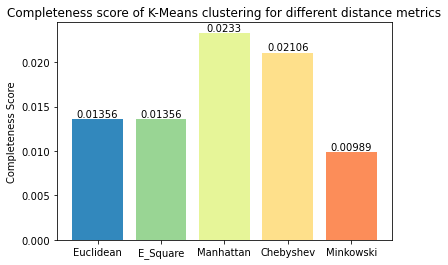

In [46]:
x_completeness = ('Euclidean','E_Square','Manhattan','Chebyshev','Minkowski')
y_completeness = [completeness_score_Euclidean,completeness_score_E_Square,completeness_score_Manhattan,completeness_score_Chebyshev,completeness_score_Minkowski]
plt.bar(x_completeness,y_completeness,color=Spectral6)

for a,b in zip(x_completeness,y_completeness):
    plt.text(a,b,b,ha='center',va='bottom')

plt.ylabel('Completeness Score')
plt.title('Completeness score of K-Means clustering for different distance metrics')
plt.show()

In [47]:
# Calinski-Harabaz Index

def calculate_Calinski_Harabaz_score_kmeans_by_method(method):
    Calinski_Harabaz_score = metrics.calinski_harabasz_score(sample,pre_data_set[method])
    return Calinski_Harabaz_score

In [48]:
calinski_harabaz_score_Euclidean = round(calculate_Calinski_Harabaz_score_kmeans_by_method(type_metric.EUCLIDEAN),5)
calinski_harabaz_score_E_Square = round(calculate_Calinski_Harabaz_score_kmeans_by_method(type_metric.EUCLIDEAN_SQUARE),5)
calinski_harabaz_score_Manhattan = round(calculate_Calinski_Harabaz_score_kmeans_by_method(type_metric.MANHATTAN),5)
calinski_harabaz_score_Chebyshev = round(calculate_Calinski_Harabaz_score_kmeans_by_method(type_metric.CHEBYSHEV),5)
calinski_harabaz_score_Minkowski = round(calculate_Calinski_Harabaz_score_kmeans_by_method(type_metric.MINKOWSKI),5)

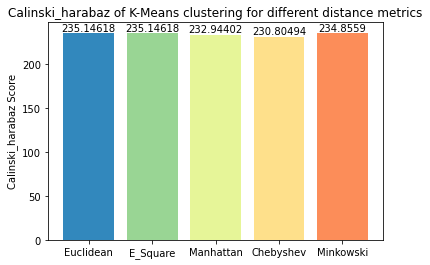

In [49]:
x_calinski_harabaz = ('Euclidean','E_Square','Manhattan','Chebyshev','Minkowski')
y_calinski_harabaz = [calinski_harabaz_score_Euclidean,calinski_harabaz_score_E_Square,calinski_harabaz_score_Manhattan,calinski_harabaz_score_Chebyshev,calinski_harabaz_score_Minkowski]
plt.bar(x_calinski_harabaz,y_calinski_harabaz,color=Spectral6)

for a,b in zip(x_calinski_harabaz,y_calinski_harabaz):
    plt.text(a,b,b,ha='center',va='bottom')

plt.ylabel('Calinski_harabaz Score')
plt.title('Calinski_harabaz of K-Means clustering for different distance metrics')
plt.show()

In [50]:
# Accuracy Score

def calculate_accuracy_score_kmeans_by_method(method):
    accuracy_score = metrics.accuracy_score(new_class_data, pre_data_set[method])
    return accuracy_score

In [51]:
accuracy_score_Euclidean = round(calculate_accuracy_score_kmeans_by_method(type_metric.EUCLIDEAN),5)
accuracy_score_E_Square = round(calculate_accuracy_score_kmeans_by_method(type_metric.EUCLIDEAN_SQUARE),5)
accuracy_score_Manhattan = round(calculate_accuracy_score_kmeans_by_method(type_metric.MANHATTAN),5)
accuracy_score_Chebyshev = round(calculate_accuracy_score_kmeans_by_method(type_metric.CHEBYSHEV),5)
accuracy_score_Minkowski = round(calculate_accuracy_score_kmeans_by_method(type_metric.MINKOWSKI),5)

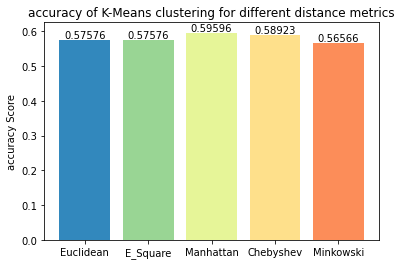

In [52]:
x_accuracy = ('Euclidean','E_Square','Manhattan','Chebyshev','Minkowski')
y_accuracy = [accuracy_score_Euclidean,accuracy_score_E_Square,accuracy_score_Manhattan,accuracy_score_Chebyshev,accuracy_score_Minkowski]
plt.bar(x_accuracy,y_accuracy,color=Spectral6)

for a,b in zip(x_accuracy,y_accuracy):
    plt.text(a,b,b,ha='center',va='bottom')

plt.ylabel('accuracy Score')
plt.title('accuracy of K-Means clustering for different distance metrics')
plt.show()

In [53]:
# Silhouette Coefficient

def calculate_silhouette_score_kmeans_by_method(method):
    if method == type_metric.EUCLIDEAN:
        metric = 'euclidean'
    elif method == type_metric.EUCLIDEAN_SQUARE:
        metric = 'sqeuclidean'
    elif method == type_metric.MANHATTAN:
        metric = 'manhattan'
    elif method == type_metric.CHEBYSHEV:
        metric = 'chebyshev'
    elif method == type_metric.MINKOWSKI:
        metric = 'minkowski'
    silhouette_score = metrics.silhouette_score(sample,pre_data_set[method],metric=metric)
    return silhouette_score

In [54]:
silhouette_score_Euclidean = round(calculate_silhouette_score_kmeans_by_method(type_metric.EUCLIDEAN),5)
silhouette_score_E_Square = round(calculate_silhouette_score_kmeans_by_method(type_metric.EUCLIDEAN_SQUARE),5)
silhouette_score_Manhattan = round(calculate_silhouette_score_kmeans_by_method(type_metric.MANHATTAN),5)
silhouette_score_Chebyshev = round(calculate_silhouette_score_kmeans_by_method(type_metric.CHEBYSHEV),5)
silhouette_score_Minkowski = round(calculate_silhouette_score_kmeans_by_method(type_metric.MINKOWSKI),5)

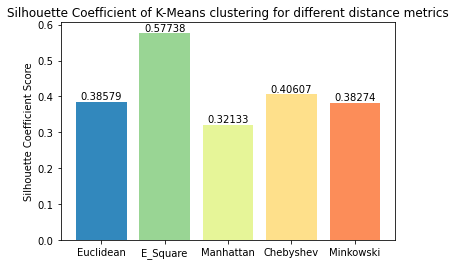

In [55]:
x_silhouette = ('Euclidean','E_Square','Manhattan','Chebyshev','Minkowski')
y_silhouette = [silhouette_score_Euclidean,silhouette_score_E_Square,silhouette_score_Manhattan,silhouette_score_Chebyshev,silhouette_score_Minkowski]
plt.bar(x_silhouette,y_silhouette,color=Spectral6)

for a,b in zip(x_silhouette,y_silhouette):
    plt.text(a,b,b,ha='center',va='bottom')

plt.ylabel('Silhouette Coefficient Score')
plt.title('Silhouette Coefficient of K-Means clustering for different distance metrics')
plt.show()

In [56]:
#9.Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why?

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Use ANOVA to select the best three features
bestfeatures_ANOVA = SelectKBest(k=3)
fit_ANOVA = bestfeatures_ANOVA.fit(att_data,new_class_data)
dfscores_ANOVA = pd.DataFrame(fit_ANOVA.scores_)
dfcolumns = pd.DataFrame(att_data.columns)

featureScores_ANOVA = pd.concat([dfcolumns,dfscores_ANOVA],axis=1)
featureScores_ANOVA.columns = ['Features','Score'] 
print(featureScores_ANOVA.nlargest(3,'Score'))

print('*'*30)

# Use chi2 to select the best three features
bestfeatures_chi2 = SelectKBest(score_func=chi2,k=3)
fit_chi2 = bestfeatures_chi2.fit(att_data,new_class_data)
dfscores_chi2 = pd.DataFrame(fit_chi2.scores_)

featureScores_chi2 = pd.concat([dfcolumns,dfscores_chi2],axis=1)
featureScores_chi2.columns = ['Features','Score'] 
print(featureScores_chi2.nlargest(3,'Score'))

   Features       Score
12     thal  113.219319
11       ca   80.577866
9   oldpeak   64.677208
******************************
   Features       Score
7   thalach  187.053104
11       ca   82.730613
9   oldpeak   68.570533


In [58]:
# For the best three features got from ANOVA:
att_data_ANOVA = pd.DataFrame(att_data, columns=['thal','ca','oldpeak'])
att_data_ANOVA[['thal']] = att_data_ANOVA[['thal']].astype(float,errors='raise')
att_data_ANOVA[['ca']] = att_data_ANOVA[['ca']].astype(float,errors='raise')

kmeans_ANOVA = KMeans(n_clusters=2)
kmeans_ANOVA.fit(att_data_ANOVA)

centroids_ANOVA = kmeans_ANOVA.cluster_centers_
labels_ANOVA = kmeans_ANOVA.labels_

print("The purity of the best three features got from ANOVA is:",round(purity_score(labels_ANOVA,new_class_data),2),"%")

The purity of the best three features got from ANOVA is: 76.43 %


In [59]:
# For the best three features got from chi2:
att_data_chi2 = pd.DataFrame(att_data, columns=['thalach','ca','oldpeak'])
att_data_chi2[['ca']] = att_data_chi2[['ca']].astype(float,errors='raise')

kmeans_chi2 = KMeans(n_clusters=2)
kmeans_chi2.fit(att_data_chi2)

centroids_chi2 = kmeans_chi2.cluster_centers_
labels_chi2 = kmeans_chi2.labels_

print("The purity of the best three features got from chi2 is:",purity_score(labels_chi2,new_class_data),"%")

The purity of the best three features got from chi2 is: 70.37 %


In [60]:
#10. Create a ML model for classifying subjects into two classes applying following constraints on above dataset. 

In [61]:
#a. Report classification performance scores. Select scores that you think best for describing the model performance with appropriate justification. 

In [62]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = np.squeeze(att_data)
y = np.squeeze(new_class_data)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
print(' X_train.shape={}\n y_train.shape={}\n X_test.shape={}\n y_test.shape={}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

 X_train.shape=(237, 13)
 y_train.shape=(237,)
 X_test.shape=(60, 13)
 y_test.shape=(60,)


In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def evaluation(y_test,y_pred):
    e_accuracy_score = round(metrics.accuracy_score(y_test,y_pred),4)*100
    e_classification_report = metrics.classification_report(y_test,y_pred)
    e_confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    return e_accuracy_score,e_classification_report,e_confusion_matrix

In [64]:
# Logistic Regression

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

a,b,c = evaluation(y_test,y_pred)
print('The accuracy score is:',a,'%')
print('*'*50)
print('The classification report is:\n',b)
print('*'*50)
print('The confusion matrix is:\n',c)

The accuracy score is: 91.67 %
**************************************************
The classification report is:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.85      0.96      0.90        24

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60

**************************************************
The confusion matrix is:
 [[32  4]
 [ 1 23]]


C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


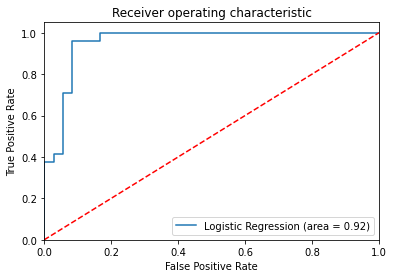

In [65]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")
plt.show()

In [66]:
#b. Have you taken any step to check generalisability of the model? What is that and how it ensures generalisability.

C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

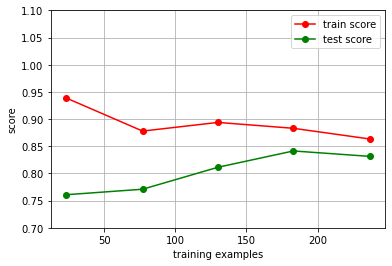

In [67]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,test_scores=learning_curve(logreg,X,y)
plt.ylim((0.7,1.1)) 
plt.xlabel("training examples")
plt.ylabel("score")
plt.grid()
plt.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label='train score')
plt.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label='test score')
plt.legend(loc='best')
plt.show()

In [68]:
#c. Can you design and develop any other model for solving this problem? If so, then why have you used the reported one? Give your justification

In [69]:
# Naive Bayes classifier

from sklearn.naive_bayes import MultinomialNB

MulNB = MultinomialNB()
MulNB.fit(X_train,y_train)
y_pred = MulNB.predict(X_test)

a,b,c = evaluation(y_test,y_pred)
print('The accuracy score is:',a,'%')
print('*'*50)
print('The classification report is:\n',b)
print('*'*50)
print('The confusion matrix is:\n',c)

The accuracy score is: 85.0 %
**************************************************
The classification report is:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        36
           1       0.76      0.92      0.83        24

    accuracy                           0.85        60
   macro avg       0.85      0.86      0.85        60
weighted avg       0.86      0.85      0.85        60

**************************************************
The confusion matrix is:
 [[29  7]
 [ 2 22]]


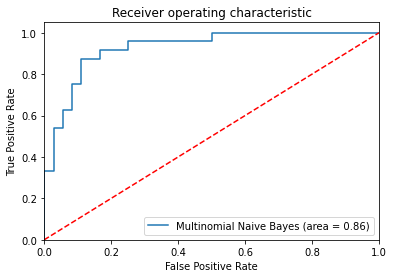

In [70]:
# Draw ROC graph and print AUC value

MulNB_roc_auc = roc_auc_score(y_test, MulNB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, MulNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Multinomial Naive Bayes (area = %0.2f)' % MulNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")
plt.show()

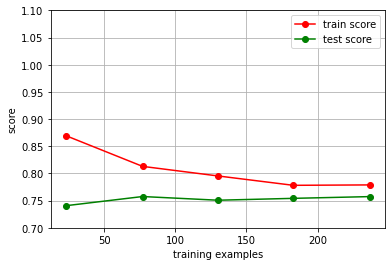

In [71]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,test_scores=learning_curve(MulNB,X,y)
plt.ylim((0.7,1.1)) 
plt.xlabel("training examples")
plt.ylabel("score")
plt.grid()
plt.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label='train score')
plt.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label='test score')
plt.legend(loc='best')
plt.show()

In [72]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)

a,b,c = evaluation(y_test,y_pred)
print('The accuracy score is:',a,'%')
print('*'*50)
print('The classification report is:\n',b)
print('*'*50)
print('The confusion matrix is:\n',c)

The accuracy score is: 90.0 %
**************************************************
The classification report is:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

**************************************************
The confusion matrix is:
 [[32  4]
 [ 2 22]]


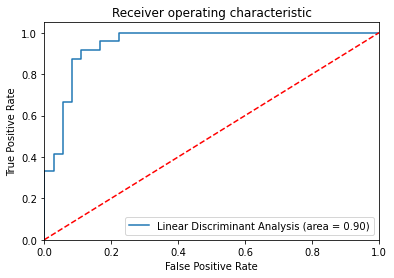

In [73]:
# Draw ROC graph and print AUC value

lda_roc_auc = roc_auc_score(y_test, lda.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Linear Discriminant Analysis (area = %0.2f)' % lda_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")
plt.show()

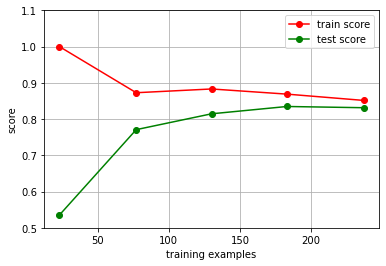

In [74]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,test_scores=learning_curve(lda,X,y)
plt.ylim((0.5,1.1)) 
plt.xlabel("training examples")
plt.ylabel("score")
plt.grid()
plt.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label='train score')
plt.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label='test score')
plt.legend(loc='best')
plt.show()

In [75]:
# Print the coefficients of linear discriminant

feature_cols = []
for each in att_data:
    feature_cols.append(each)

feature_coef = list(zip(feature_cols,np.squeeze(lda.coef_)))
for a,b in feature_coef:
    print(a,b)

Age -0.00034527879969372446
Sex 1.262801719373997
chest pain type 0.7637135464875642
Trestbps 0.029506625111413803
chol 0.0017079652592439825
fbs -1.2319438107145153
restecg 0.24112110569977208
thalach -0.02235195457239031
exang 1.3900843643689447
oldpeak 0.02515853589549697
slope 0.5694754444695334
ca 1.1386682576789964
thal 0.4672476201476715


In [76]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 2)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

a,b,c = evaluation(y_test,y_pred)
print('The accuracy score is:',a,'%')
print('*'*50)
print('The classification report is:\n',b)
print('*'*50)
print('The confusion matrix is:\n',c)

The accuracy score is: 56.67 %
**************************************************
The classification report is:
               precision    recall  f1-score   support

           0       0.62      0.72      0.67        36
           1       0.44      0.33      0.38        24

    accuracy                           0.57        60
   macro avg       0.53      0.53      0.52        60
weighted avg       0.55      0.57      0.55        60

**************************************************
The confusion matrix is:
 [[26 10]
 [16  8]]


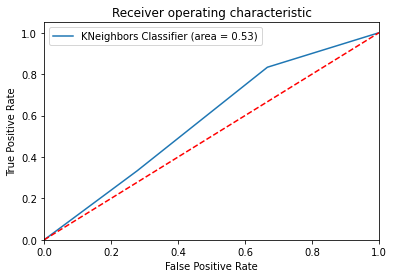

In [77]:
# Draw ROC graph and print AUC value

KNN_roc_auc = roc_auc_score(y_test, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, KNN.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors Classifier (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")
plt.show()

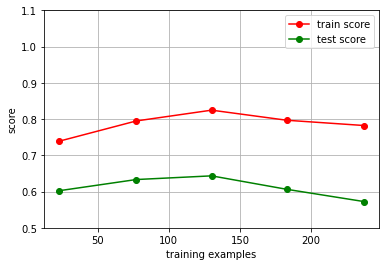

In [78]:
train_sizes,train_scores,test_scores=learning_curve(KNN,X,y)
plt.ylim((0.5,1.1)) 
plt.xlabel("training examples")
plt.ylabel("score")
plt.grid()
plt.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label='train score')
plt.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label='test score')
plt.legend(loc='best')
plt.show()

In [79]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)

a,b,c = evaluation(y_test,y_pred)
print('The accuracy score is:',a,'%')
print('*'*50)
print('The classification report is:\n',b)
print('*'*50)
print('The confusion matrix is:\n',c)

The accuracy score is: 86.67 %
**************************************************
The classification report is:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60

**************************************************
The confusion matrix is:
 [[31  5]
 [ 3 21]]


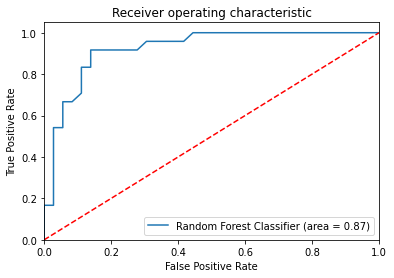

In [80]:
# Draw ROC graph and print AUC value

RFC_roc_auc = roc_auc_score(y_test, RFC.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % RFC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")
plt.show()

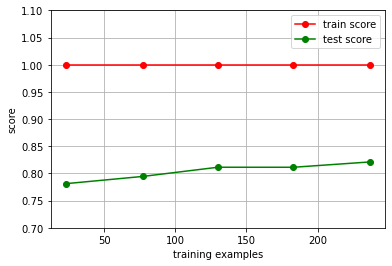

In [81]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,test_scores=learning_curve(RFC,X,y)
plt.ylim((0.7,1.1)) 
plt.xlabel("training examples")
plt.ylabel("score")
plt.grid()
plt.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label='train score')
plt.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label='test score')
plt.legend(loc='best')
plt.show()

In [82]:
# 11. Suppose that a company has a number (>=500) of resorts around the globe.

In [83]:
#a. Identify a list of features (>=5) that can be used to describe these resorts.

In [84]:
#b. Create a dataset (rows>=500) and explain all variables. You can generate data either synthetically or collecting from similar datasets. Submit your created dataset. In addition, please provide links in case you have collected the dataset.

In [85]:
data= pd.read_csv("resorts.csv")
print(data)

               id                                               name  \
0        resort_1  Affordable Loft Studio in a Shophouse (Neil Road)   
1       resort_10              Amazing apartment with a unique view!   
2      resort_100  Besiden Bugis HAJI lane APTwith awsome facilit...   
3     resort_1000             Pretty condo go city centre 10 minutes   
4     resort_1001              prewar doublebed *RmK > lavender MRT.   
...           ...                                                ...   
1418   resort_995       PREMIER 1BEDROOM SUITES AT MARINA BAY CENTRE   
1419   resort_996  Premium Apt close to MRT station & Shopping Malls   
1420   resort_997  Premium Apt close to MRT station & Shopping Malls   
1421   resort_998  Premium Central Studio Apt @ Orchard/Somerset ...   
1422   resort_999                       PREMIUM STUDIO, TRANS STREET   

      neighbourhood  standard_studio  standard_double_room  vacation_home  \
0       Bukit Merah                1                     0

In [86]:
df = data.drop(['id','name','neighbourhood','number_of_reviews','reviews_per_month','minimum_nights','standard_studio','standard_double_room','vacation_home','free_WIFI','in-room_safe_box','mini_bar','labels'],axis=1)
print(df)

      price  air_conditioning  heater  swimming_pool  skii_facility
0       140                 1       1              0              1
1       250                 1       0              1              1
2       219                 1       1              1              1
3        42                 0       0              0              0
4        43                 1       0              0              0
...     ...               ...     ...            ...            ...
1418    276                 1       1              1              1
1419    135                 1       0              0              1
1420    144                 1       0              0              0
1421    131                 1       0              0              0
1422    200                 1       1              1              0

[1423 rows x 5 columns]


In [87]:
X = np.array(df)
labels = np.array(data['labels'])

In [88]:
#c. Build a ML model that can help a customer to select appropriate set of resorts based on the season of travel. Present and describe the performance of your model.

C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Text(0.5, 0, 'Number of cluster')

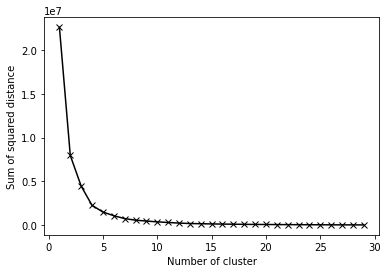

In [89]:
totSqrdDist=[]
kRange=range(1,30)
for k in kRange:
    kmns = KMeans(n_clusters=k)
    kmns = kmns.fit(X)
    totSqrdDist.append(kmns.inertia_)

plt.plot(kRange,totSqrdDist,'-xk')
plt.ylabel('Sum of squared distance')
plt.xlabel('Number of cluster')

In [90]:
#Accroding to the graph above, n = 5 is a relative good choice for conducting clustering.

In [91]:
#pip install kmodes

In [92]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def eva(labels,Ylabels):
    print("The adjusted Rand score is:",round(adjusted_rand_score(Ylabels,labels),4))
    print("The adjusted Mutual info score is:",round(adjusted_mutual_info_score(Ylabels,labels),4))
    print("The jaccard score is:",round(jaccard_score(labels, Ylabels, average='weighted'),4))
    print("The purity is:",round(purity_score(Ylabels,labels),2),"%")
    print("The accuracy score is:",round(accuracy_score(Ylabels,labels),2))
    print(classification_report(labels,Ylabels))

In [93]:
from kmodes.kmodes import KModes

model = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
Ylabels = model.fit_predict(X)

print('*'*50)
eva(labels,Ylabels)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 42, cost: 2176.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 103, cost: 2144.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 75, cost: 2301.0
Run 3, iteration: 2/100, moves: 0, cost: 2301.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 263, cost: 2213.0
Run 4, iteration: 2/100, moves: 2, cost: 2213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 18, cost: 2245.0
Best run was number 2
**************************************************
The adjusted Rand score is: 0.083
The adjusted Mutual info score is: 0.1539
The jaccard score is: 0.0692
The purity is: 50.67 %
The accuracy score is: 0.13
              precision    r

C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\

In [94]:
from kmodes.kprototypes import KPrototypes

model = KPrototypes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 0)
Ylabels = model.fit_predict(X,categorical=[4])

eva(labels,Ylabels)

The adjusted Rand score is: 0.0544
The adjusted Mutual info score is: 0.1744
The jaccard score is: 0.0016
The purity is: 47.01 %
The accuracy score is: 0.01
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00       350
           2       0.00      0.00      0.00       235
           3       0.03      0.13      0.04        97
           4       0.00      0.00      0.00        84
           5       0.00      0.00      0.00       657

    accuracy                           0.01      1423
   macro avg       0.00      0.02      0.01      1423
weighted avg       0.00      0.01      0.00      1423



C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\

In [95]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5)
Ylabels = model.fit_predict(X)

eva(labels,Ylabels)

The adjusted Rand score is: 0.0573
The adjusted Mutual info score is: 0.1724
The jaccard score is: 0.0441
The purity is: 46.38 %
The accuracy score is: 0.09
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.18      0.22      0.20       350
           2       0.00      0.00      0.00       235
           3       0.21      0.33      0.26        97
           4       0.20      0.20      0.20        84
           5       0.00      0.00      0.00       657

    accuracy                           0.09      1423
   macro avg       0.10      0.12      0.11      1423
weighted avg       0.07      0.09      0.08      1423



C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\

In [96]:
from sklearn.cluster import Birch

model = Birch(threshold=0.01, n_clusters=5)
Ylabels = model.fit_predict(X)

eva(labels,Ylabels)

The adjusted Rand score is: 0.0573
The adjusted Mutual info score is: 0.1724
The jaccard score is: 0.0955
The purity is: 46.38 %
The accuracy score is: 0.23
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.37      0.78      0.50       350
           2       0.00      0.00      0.00       235
           3       0.10      0.43      0.17        97
           4       0.20      0.20      0.20        84
           5       0.00      0.00      0.00       657

    accuracy                           0.23      1423
   macro avg       0.11      0.24      0.15      1423
weighted avg       0.11      0.23      0.15      1423



C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\

In [97]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=5)
Ylabels = model.fit_predict(X)

eva(labels,Ylabels)

C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


The adjusted Rand score is: 0.0513
The adjusted Mutual info score is: 0.1632
The jaccard score is: 0.0064
The purity is: 47.22 %
The accuracy score is: 0.02
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.01      0.01      0.01       350
           2       0.00      0.00      0.00       235
           3       0.05      0.27      0.08        97
           4       0.13      0.05      0.07        84
           5       0.00      0.00      0.00       657

    accuracy                           0.02      1423
   macro avg       0.03      0.05      0.03      1423
weighted avg       0.01      0.02      0.01      1423



C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\

In [98]:
model = KMeans(n_clusters=5,init='random')
Ylabelsl = model.fit_predict(X)

eva(labels,Ylabels)

The adjusted Rand score is: 0.0513
The adjusted Mutual info score is: 0.1632
The jaccard score is: 0.0064
The purity is: 47.22 %
The accuracy score is: 0.02
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.01      0.01      0.01       350
           2       0.00      0.00      0.00       235
           3       0.05      0.27      0.08        97
           4       0.13      0.05      0.07        84
           5       0.00      0.00      0.00       657

    accuracy                           0.02      1423
   macro avg       0.03      0.05      0.03      1423
weighted avg       0.01      0.02      0.01      1423



C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\

In [99]:
X = np.squeeze(df)
y = np.squeeze(labels)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
print(' X_train.shape={}\n y_train.shape={}\n X_test.shape={}\n y_test.shape={}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

 X_train.shape=(1138, 5)
 y_train.shape=(1138,)
 X_test.shape=(285, 5)
 y_test.shape=(285,)


In [100]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

eva(y_test,y_pred)

The adjusted Rand score is: 0.1404
The adjusted Mutual info score is: 0.2083
The jaccard score is: 0.3505
The purity is: 55.09 %
The accuracy score is: 0.55
              precision    recall  f1-score   support

           1       0.65      0.35      0.45        75
           2       0.49      0.79      0.60        47
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        19
           5       0.55      0.76      0.64       123

    accuracy                           0.55       285
   macro avg       0.34      0.38      0.34       285
weighted avg       0.49      0.55      0.49       285



C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bellal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i